In [139]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [140]:
data = pd.read_csv("hackathon-CUSP-WI_clean.csv")
print data.columns
data.head(3)

Index([u'Unnamed: 0', u'DA Case Status', u'Ref Date', u'Referral Type',
       u'Ref Agency', u'Primary Officer', u'Prosecutor',
       u'Reviewing Prosecutor', u'Unit', u'VW Assigned', u'Def Pros Counselor',
       u'Defendant Name', u'Defendant Address Line1',
       u'Defendant Address Line2', u'Defendant City', u'Defendant State',
       u'Defendant Zip', u'Defendant Race', u'Defendant Gender',
       u'Defendant DOB', u'Defendant's Age at Incident',
       u'Defendant�s Arrest Status', u'Defendant Case Status', u'CC# Year',
       u'Incident Date', u'Municipality', u'Incident Zip', u'Type',
       u'Summary Charge Statute #', u'Summary Charge Desc', u'Severity',
       u'Class', u'Charge Status', u'Charge Dispo', u'Dispo Date', u'Modifier',
       u'Enhancer1', u'Enhancer2', u'Enhancer3', u'Child Abuse',
       u'Child Neglect', u'Child Pornography', u'Child Sexual Assault',
       u'Child Support', u'Civil Forfeiture', u'Civil Traffic', u'Criminal',
       u'Criminal Traffic', u'

,Unnamed: 0,DA Case Status,Ref Date,Referral Type,Ref Agency,Primary Officer,Prosecutor,Reviewing Prosecutor,Unit,VW Assigned,...,Sensitive,Sex Offender Registry Violation,Sex Predator,Sexual Assault,Special Pros/In,Special Pros/Out,Special Prosecution,Success,Wage Claims,Worthless Check
0,0,No Prosecution,2014-01-02 08:31:23,In Custody,Menasha Police Department,Sawyer/Mauthe/Gruss/Groeschel,E,NaN,Family Unit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Closed,2014-01-02 09:51:27,In Custody,Winnebago County Sheriff's Department,Mack/Braman/Woldt/Theyerl,F,NaN,Assaultive Crimes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,No Prosecution,2014-01-02 10:50:11,In Custody,Winnebago County Sheriff's Department,Mack/Braman/Woldt/Theyerl,I,NaN,Assaultive Crimes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploring Severity by zipcodes

In [141]:
data[['DA Case Status','Severity', u'Class', u'Incident Zip']].groupby([u'Incident Zip', u'Severity', u'Class']).count()

DA Case Status
Incident Zip Severity Class                
54901.0      F        B                   1
                      C                   4
                      D                   1
                      E                   1
                      F                   9
                      G                   3
                      H                  31
                      I                  10
             M        A                 130
                      B                  65
                      C                   2
                      U                  24
54902.0      F        B                   1
                      C                   5
                      F                   1
                      G                   1
                      H                   7
                      I                   5
             M        A                  25
                      B                  35
                      U                   7
54904.0      F        D                   1
                      E                   1
                      F                   2
                      H                   1
                      I                   1
             M        A                  18
                      B                  11
                      U                   5
             O        D                   1
...                                     ...
54937        M        A                   1
54940        M        A                   1
54947        M        A                   3
54952        F        D                   1
                      H                   3
                      I                   2
             M        A                  13
                      B                   7
                      U                  15
54956        F        B                   1
                      C                   2
                      D                   2
                      F                   2
                      G                   4
                      H                   5
                      I                   7
             M        A                  20
                      B                   6
                      U                   9
54963        F        H                   1
             M        U                   2
54964        F        U                   1
             M        A                   1
54971        M        A                   1
54986        F        F                   1
             M        A                   2
                      B                   2
                      U                   1
             O        U                   1
\            M        A                   1

[126 rows x 1 columns]

In [143]:
# print data[u'Summary Charge Statute #'].unique()
data[u'Type'].unique()

array(['R', '1', 'D', nan, '2', '4', '3', '5'], dtype=object)

In [144]:
data[data[u'DA Case Status'] == 'Charged'][[u'DA Case Status', u'Charge Dispo']].head()

,DA Case Status,Charge Dispo
443,Charged,NaN
709,Charged,NaN
938,Charged,NaN
1230,Charged,NaN
2453,Charged,NaN


In [145]:
data[u'Incident Zip'].unique() #zipcodes where incidents happened

array([nan, 54901.0, 54902.0, 54956.0, 54963.0, 54952.0, 54904.0, 54914.0,
       54947.0, 54915.0, 54986.0, 54964.0, 54940.0, 54923.0, 54980.0,
       '54901', '54904', '54956', '54963', '54952', '54902', '54915', '\\',
       '54964', '54937', '54986', '54947', '54971', '54940'], dtype=object)

In [146]:
data[u'Defendant Zip'].unique().shape #zipcodes where defendent lived

(131L,)

In [194]:
print data[u'Charge Dispo'].unique()  #unique values for charge disposition
data.groupby([u'Charge Dispo']).count() #grouping by charge disposition

[nan 'Guilty Due to No Contest Plea' 'Dismissed on Prosecutors Motion'
 'Guilty Due to Guilty Plea' 'Charge Dismissed but Read In'
 'Found Guilty at Jury Trial' 'Found Guilty at Court Trial'
 'Dismissed on Defendants Motion' 'Deferred Prosecution or Sentence'
 'Dismissed Before Initial Appearance'
 'Discharged After Being Found Incompetent' 'Amended Complaint Filed'
 'Amended By Prosecutor Or Court'
 'Dismissed-Charges Consolidated into Different County'
 'Dismissed on Courts own Motion' 'Found Not Guilty at Jury Trial'
 'Guilty but Not Guilty Due to Mental Disease/Defect'
 'Found Not Guilty at Court Trial'
 'Waived Extradition To Unknown Jurisdiction' 'Administrative Disposition'
 'Other']


,Unnamed: 0,DA Case Status,Ref Date,Referral Type,Ref Agency,Primary Officer,Prosecutor,Reviewing Prosecutor,Unit,VW Assigned,...,Sensitive,Sex Offender Registry Violation,Sex Predator,Sexual Assault,Special Pros/In,Special Pros/Out,Special Prosecution,Success,Wage Claims,Worthless Check
Charge Dispo,,,,,,,,,,,,,,,,,,,,,
Administrative Disposition,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Amended By Prosecutor Or Court,17,17,17,8,17,11,17,0,17,0,...,0,0,0,0,0,0,0,0,0,0
Amended Complaint Filed,56,56,56,13,55,41,56,0,56,0,...,0,0,0,0,0,0,0,0,0,0
Charge Dismissed but Read In,758,758,758,657,755,700,758,0,758,0,...,1,2,0,2,0,0,0,0,0,0
Deferred Prosecution or Sentence,338,338,338,329,338,331,338,0,338,0,...,0,0,0,0,0,0,0,0,0,1
Discharged After Being Found Incompetent,3,3,3,2,2,2,3,0,3,0,...,0,0,0,1,0,0,0,0,0,0
Dismissed Before Initial Appearance,33,33,33,24,32,30,33,0,15,0,...,0,1,0,0,0,0,0,0,0,1
Dismissed on Courts own Motion,5,5,5,2,5,4,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0
Dismissed on Defendants Motion,36,36,36,31,36,32,36,0,36,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
# data[data[u'DA Case Status'] == 'Case Accepted'][[u'DA Case Status', u'Charge Dispo']]

In [196]:
Def_zip = data.groupby([u'Incident Zip']).count()
Def_zip = Def_zip.reset_index()
Def_zip = Def_zip[[u'Incident Zip', u'Unnamed: 0']]
Def_zip = Def_zip.rename(columns={u'Unnamed: 0': 'Count'})
Def_zip = Def_zip[:27]
Def_zip.head()

,Incident Zip,Count
0,54901,281
1,54902,87
2,54904,41
3,54914,1
4,54915,6


In [197]:
# Def_zip['Incident Zip'] = Def_zip['Incident Zip'].astype(int)

In [198]:
Def_zip = Def_zip.sort(['Count'], ascending= [False])

C:\Users\ps336\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


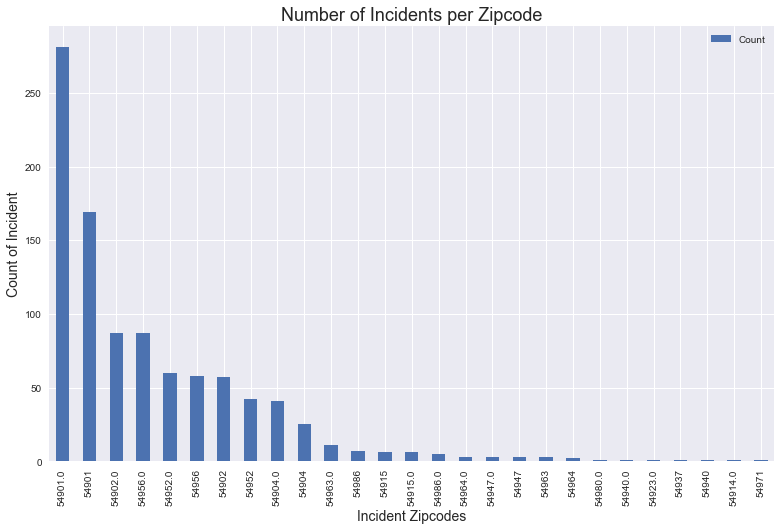

In [199]:
ax = Def_zip.plot(kind='bar',rot=360, figsize=(13,8))
ax.set_xlabel("Incident Zipcodes", size = 14)
ax.set_ylabel("Count of Incident", size =14)
ax.set_title("Number of Incidents per Zipcode", size = 18)
ax.set_xticklabels(Def_zip['Incident Zip'], rotation=90)

In [200]:
data1 = pd.read_csv('wi_centroid.csv')
data1.head()

,Unnamed: 0,GEOID10,geometry,centroid,area
0,0,53406,"POLYGON ((697001.6339924306 259111.7556624794,...",POINT (694791.8421371196 253030.3776194569),1.546982
1,1,53501,MULTIPOLYGON (((596174.0940122458 237123.92080...,POINT (596654.5249659717 237509.7574519539),0.006053
2,2,53502,"POLYGON ((563220.2822070753 257889.5610522227,...",POINT (565686.2667921071 251304.0815120926),4.764290
3,3,53503,"POLYGON ((533175.327644023 296071.6486484241, ...",POINT (523567.9509882115 296291.9851296617),5.376877
4,4,53504,"POLYGON ((540004.2325915087 255346.6063553197,...",POINT (531459.7469693656 247978.3840172211),8.538691


In [201]:
charge = data[data[[u'Charge Status', u'Charge Dispo']][u'Charge Status'] == 'Issued'
             ][[u'Charge Status',u'Charge Dispo',u'Incident Zip']]
charge.head()

,Charge Status,Charge Dispo,Incident Zip
1,Issued,Guilty Due to No Contest Plea,NaN
3,Issued,Dismissed on Prosecutors Motion,54901
4,Issued,Guilty Due to Guilty Plea,54901
5,Issued,Guilty Due to No Contest Plea,NaN
6,Issued,Guilty Due to No Contest Plea,NaN


In [202]:
chargebyZip = charge.groupby([u'Incident Zip','Charge Dispo']).count().unstack()
chargebyZip = chargebyZip.reset_index()
chargebyZip = chargebyZip.rename(columns={'Charge Dispo': 'Count'})
chargebyZip = chargebyZip.fillna(0)
chargebyZip.head()

Incident Zip                  Charge Status  \
Charge Dispo              Amended By Prosecutor Or Court   
0                   54901                            0.0   
1                   54902                            0.0   
2                   54904                            0.0   
3                   54914                            0.0   
4                   54915                            0.0   

                                                                   \
Charge Dispo Amended Complaint Filed Charge Dismissed but Read In   
0                                0.0                         32.0   
1                                0.0                          5.0   
2                                0.0                          0.0   
3                                0.0                          0.0   
4                                0.0                          2.0   

                                                  \
Charge Dispo Dismissed Before Initial Appearance   
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

                                                                             \
Charge Dispo Dismissed on Defendants Motion Dismissed on Prosecutors Motion   
0                                       1.0                            16.0   
1                                       2.0                             7.0   
2                                       1.0                             2.0   
3                                       0.0                             1.0   
4                                       0.0                             0.0   

                                                                   \
Charge Dispo Dismissed-Charges Consolidated into Different County   
0                                                           1.0     
1                                                           0.0     
2                                                           0.0     
3                                                           0.0     
4                                                           0.0     

                                                                        \
Charge Dispo Found Guilty at Jury Trial Found Not Guilty at Jury Trial   
0                                   1.0                            0.0   
1                                   0.0                            1.0   
2                                   0.0                            0.0   
3                                   0.0                            0.0   
4                                   0.0                            0.0   

                                                                      \
Charge Dispo Guilty Due to Guilty Plea Guilty Due to No Contest Plea   
0                                  9.0                          89.0   
1                                  4.0                          32.0   
2                                  3.0                          19.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   

                                                                 
Charge Dispo Guilty but Not Guilty Due to Mental Disease/Defect  
0                                                           0.0  
1                                                           0.0  
2                                                           0.0  
3                                                           0.0  
4                                                           0.0

In [203]:
chargebyZip['country'] = 'US'
chargebyZip.to_csv('charge.csv')

### Exported as csv and loaded in Carto to Visualize data.